<a href="https://colab.research.google.com/github/rubyvanrooyen/ARIWS-Cookbook/blob/main/2-Flagging_and_calibration/L_band_RFI_frequency_flagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIWS notebook with sample MeerKAT data using CASA

See the [CASA installation](https://casa.nrao.edu/casadocs/casa-5.6.0/introduction/casa6-installation-and-usage) page for information on the CASA with Jupiter notebooks and Colab
Example code for this notebook can be found on [CASA6_demo.ipynb](https://go.nrao.edu/casa6)

Refer to the [MeerKAT Cookbook](https://github.com/ska-sa/MeerKAT-Cookbook) for information related to archive data access and tokens, as well as the MeerKAT `katdal` software package.


## CASA workspace installation

In [ ]:
print("installing pre-requisite packages...")
!apt-get install -y libgfortran3

Google colab upgraded default python for runtime environment to 3.7 in Feb 2021.
At 7 May 2021, no wheel exists for casatools and casatasks installation, using CASA suggested install of pre-release version for 3.7 and 3.8.

Check current python version

In [ ]:
!python --version

Python 3.7.10


See if a wheel exist for casatools installation

https://casa.nrao.edu/casa_obtaining.shtml and     
https://casa.nrao.edu/casadocs/latest/usingcasa/obtaining-and-installing

If a wheel exists for this version of python, add the code block as per example (for 3.6)   
```
!pip install --index-url https://casa-pip.nrao.edu/repository/pypi-casa-release/simple casaplotms==1.0.24
```

No wheel currently available for 3.7, notes on work around for >=3.7    
https://www.magclouds.org/casa6-docker/html/install/usage.html    
(https://pypi.org/project/casa6-install/)

In [ ]:
!git clone https://github.com/r-xue/casa6-docker.git

Cloning into 'casa6-docker'...
remote: Enumerating objects: 316, done.
remote: Counting objects: 100% (316/316), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 316 (delta 136), reused 299 (delta 123), pack-reused 0
Receiving objects: 100% (316/316), 10.21 MiB | 17.50 MiB/s, done.
Resolving deltas: 100% (136/136), done.


In [ ]:
!ln -s /content/casa6-docker/casa6_install/casa6_install.py casa6_install.py

In [ ]:
!python casa6_install.py

In [ ]:
import os

print("building config files...")
!mkdir -p ~/.casa
!echo home, datapath = \'/content/\', [\'/content/\'] > ~/.casa/toolrc.py
!cat ~/.casa/toolrc.py

print('complete')

# check installation
import casatasks
from casatasks import listobs

building config files...
home, datapath = '/content/', ['/content/']
complete
Creating a new telemetry file


Telemetry initialized. Telemetry will send anonymized usage statistics to NRAO.
You can disable telemetry by adding the following line to the config.py file in your rcdir (e.g. ~/.casa/config.py):
telemetry_enabled = False


In [ ]:
!apt-get install -y xvfb x11-utils
!pip install pyvirtualdisplay

print(os.getenv('DISPLAY'))

import pyvirtualdisplay

_display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
                                    size=(1400, 900))
_ = _display.start()

print(os.getenv('DISPLAY'))

# Mounting Google drive locally
Mount your Google Drive on your runtime using an authorization code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Create symbolic link in the `/content` top layer folder for each processing.
Use the appropriate path to the example `1548939342_sdp_l0.ms.tar.gz` dataset you copied to your drive

**NOTE: update the path below to the appropriate directory in drive where you copied the data**

In [ ]:
!ln -s "/content/drive/MyDrive/ARIWS public datasets/1548939342_sdp_l0.ms.tar.gz"

## Data from MeerKAT archive

#### MeerKAT example data
Use shared MeerKAT example dataset 1548939342.ms.  
A PKS1934-63 imaging observation (data size 1.128 GB)

Unpack MeerKAT example data file

In [ ]:
rc = os.system("tar -xvzf 1548939342_sdp_l0.ms.tar.gz")

In [ ]:
msfile = "/content/scratch/kat/1548939342/1548939342_sdp_l0.ms"
listobs(vis=msfile)
print(os.popen("cat casa-*.log").read())

2021-05-08 11:11:43	INFO	::casa	
2021-05-08 11:11:44	INFO	::casa	CASA Version 6.1.2.7
2021-05-08 11:11:44	INFO	::casa	
2021-05-08 11:11:44	INFO	::casa	Telemetry log file: /root/.casa/casastats-6.1.2.7-242ac1c02-20210508-111144.log
2021-05-08 11:11:44	INFO	::casa	Checking telemetry submission interval
2021-05-08 11:11:44	INFO	::casa	Creating a new telemetry time stamp file./root/.casa/telemetry-242ac1c02.stamp
2021-05-08 11:11:44	INFO	::casa	Telemetry submit interval not reached. Not submitting data.
2021-05-08 11:11:44	INFO	::casa	Next telemetry data submission in: 6 days, 23:59:59.998890
2021-05-08 11:14:07	INFO	listobs::::casa	##########################################
2021-05-08 11:14:07	INFO	listobs::::casa	##### Begin Task: listobs            #####
2021-05-08 11:14:07	INFO	listobs::::casa	listobs( vis='/content/scratch/kat/1548939342/1548939342_sdp_l0.ms', selectdata=True, spw='', field='', antenna='', uvrange='', timerange='', correlation='', scan='', intent='', feed='', array=''

## Visualising and inspecting MeerKAT data

See `katdal` notebook
[Visualising MeerKAT data.ipynb](https://github.com/ska-sa/MeerKAT-Cookbook/blob/master/katdal/Visualising%20MeerKAT%20data.ipynb)
for details


In [ ]:
from IPython.display import Image
import casaplotms
from casaplotms import plotms
from casatasks import flagdata

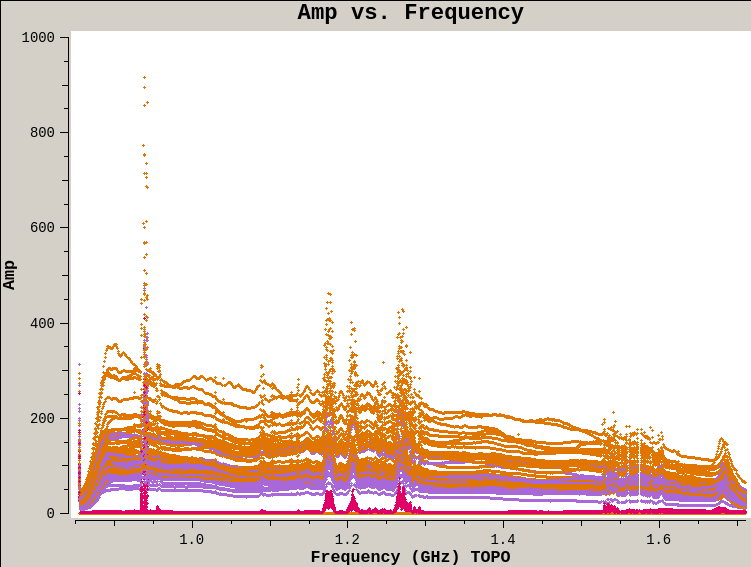

In [ ]:
plotms(vis=msfile,
       xaxis='freq',
       yaxis='amp',
       averagedata=True,
       avgtime='900',
       field='PKS1934-63',
       antenna='*&&&',
       coloraxis='corr',
       plotrange=[0.850, 1.712, 0, 0],
       showgui=False,
       plotfile='mkat_passband.png',
       overwrite=True,
       )
Image('mkat_passband.png', height=500)

To view the image, double click on the `mkat_passband.png` file or download the image to your computer.


### Bandpass edges and the Milky Way

In [ ]:
flagdata(vis=msfile, mode='manual', spw='*:856MHZ~880MHZ', action='apply');
flagdata(vis=msfile, mode='manual', spw='*:1658MHz~1800MHZ', action='apply');
flagdata(vis=msfile, mode='manual', spw='*:1420.0MHz~1421.3MHZ', action='apply');

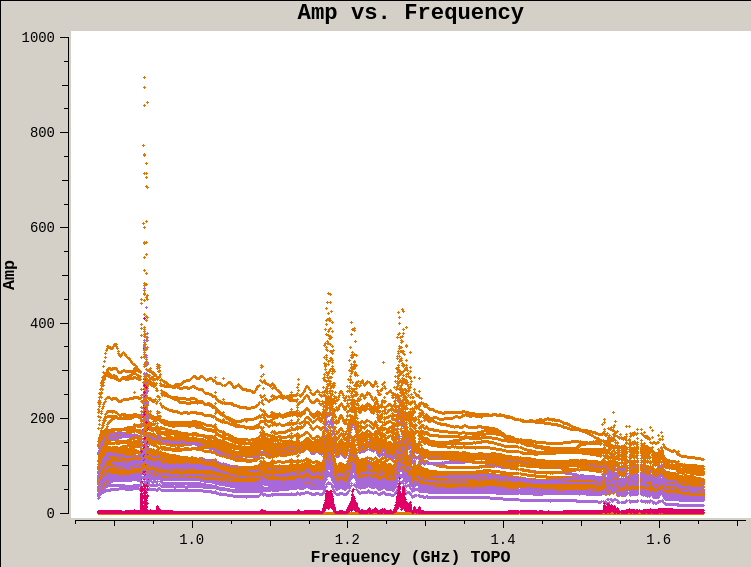

In [ ]:
plotms(vis=msfile,
       xaxis='freq',
       yaxis='amp',
       averagedata=True,
       avgtime='900',
       field='PKS1934-63',
       antenna='*&&&',
       coloraxis='corr',
       plotrange=[0.850, 1.712, 0, 0],
       showgui=False,
       plotfile='mkat_passband.png',
       overwrite=True,
       )
Image('mkat_passband.png', height=500)

### Known RFI regions for MeerKAT L-band       


#### GSM and Aviation

In [ ]:
flagdata(vis=msfile, mode='manual', spw='*:900MHz~915MHZ', action='apply');
flagdata(vis=msfile, mode='manual', spw='*:925MHz~960MHZ', action='apply');
flagdata(vis=msfile, mode='manual', spw='*:1080MHz~1095MHZ', action='apply');

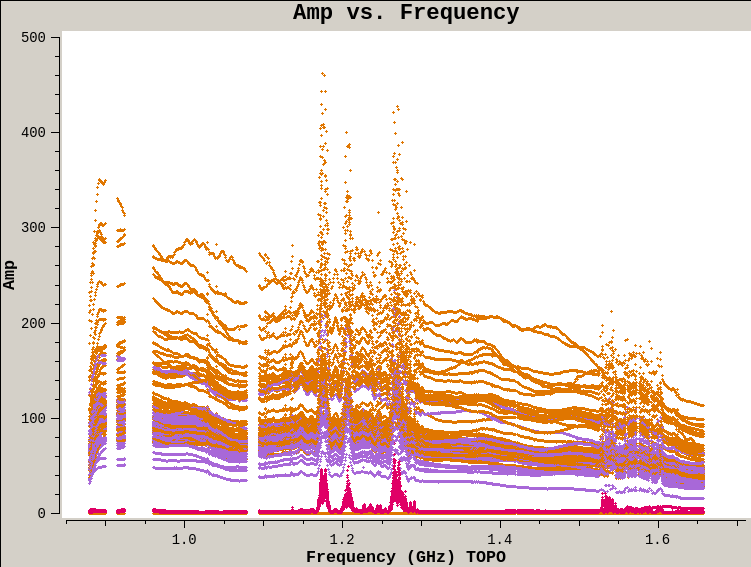

In [ ]:
plotms(vis=msfile,
       xaxis='freq',
       yaxis='amp',
       averagedata=True,
       avgtime='900',
       field='PKS1934-63',
       antenna='*&&&',
       coloraxis='corr',
       plotrange=[0.850, 1.712, 0, 0],
       showgui=False,
       plotfile='mkat_passband.png',
       overwrite=True,
       )
Image('mkat_passband.png', height=500)

#### GPS

In [ ]:
flagdata(vis=msfile, mode='manual', spw='*:1565MHz~1585MHZ', action='apply');
flagdata(vis=msfile, mode='manual', spw='*:1217MHz~1237MHZ', action='apply');
flagdata(vis=msfile, mode='manual', spw='*:1375MHz~1387MHZ', action='apply');
flagdata(vis=msfile, mode='manual', spw='*:1166MHz~1186MHZ', action='apply');

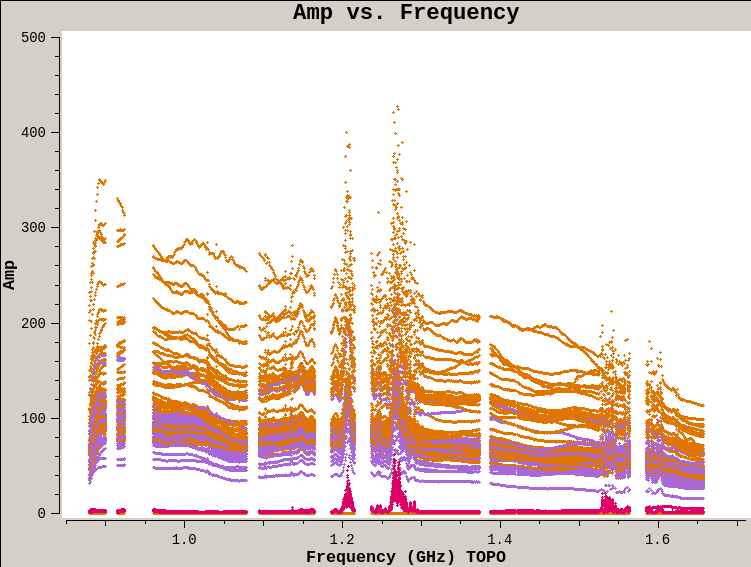

In [ ]:
plotms(vis=msfile,
       xaxis='freq',
       yaxis='amp',
       averagedata=True,
       avgtime='900',
       field='PKS1934-63',
       antenna='*&&&',
       coloraxis='corr',
       plotrange=[0.850, 1.712, 0, 0],
       showgui=False,
       plotfile='mkat_passband.png',
       overwrite=True,
       )
Image('mkat_passband.png', height=500)

#### GLONASS

In [ ]:
flagdata(vis=msfile, mode='manual', spw='*:1592MHz~1610MHZ', action='apply');
flagdata(vis=msfile, mode='manual', spw='*:1242MHz~1249MHZ', action='apply');

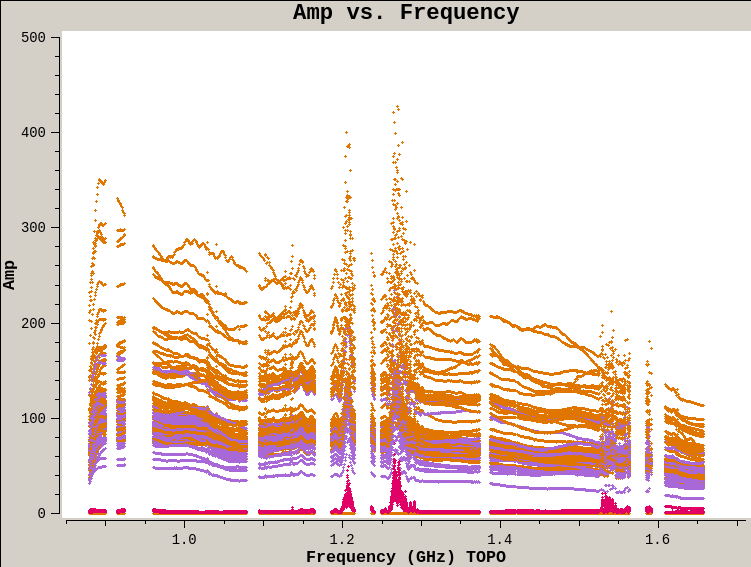

In [ ]:
plotms(vis=msfile,
       xaxis='freq',
       yaxis='amp',
       averagedata=True,
       avgtime='900',
       field='PKS1934-63',
       antenna='*&&&',
       coloraxis='corr',
       plotrange=[0.850, 1.712, 0, 0],
       showgui=False,
       plotfile='mkat_passband.png',
       overwrite=True,
       )
Image('mkat_passband.png', height=500)

#### Galileo

In [ ]:
flagdata(vis=msfile, mode='manual', spw='*:1191MHz~1217MHZ', action='apply');
flagdata(vis=msfile, mode='manual', spw='*:1260MHz~1300MHZ', action='apply');

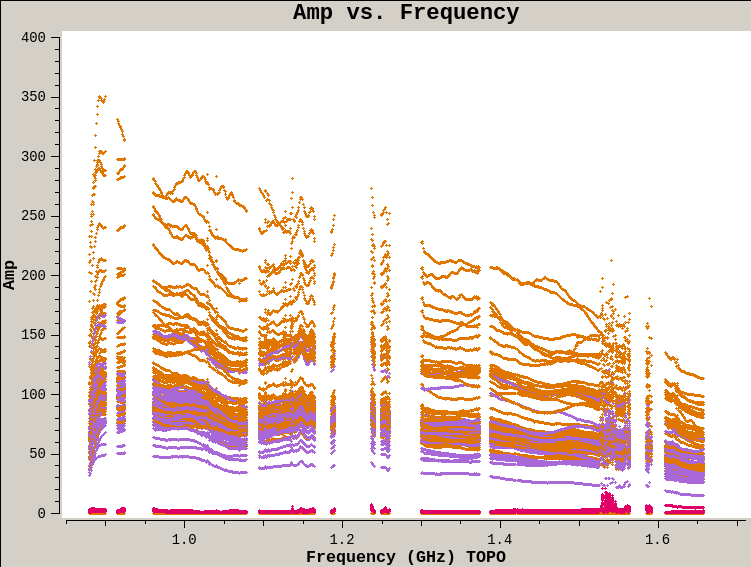

In [ ]:
plotms(vis=msfile,
       xaxis='freq',
       yaxis='amp',
       averagedata=True,
       avgtime='900',
       field='PKS1934-63',
       antenna='*&&&',
       coloraxis='corr',
       plotrange=[0.850, 1.712, 0, 0],
       showgui=False,
       plotfile='mkat_passband.png',
       overwrite=True,
       )
Image('mkat_passband.png', height=500)

#### Afristar

In [ ]:
flagdata(vis=msfile, mode='manual', spw='*:1453MHz~1490MHZ', action='apply');

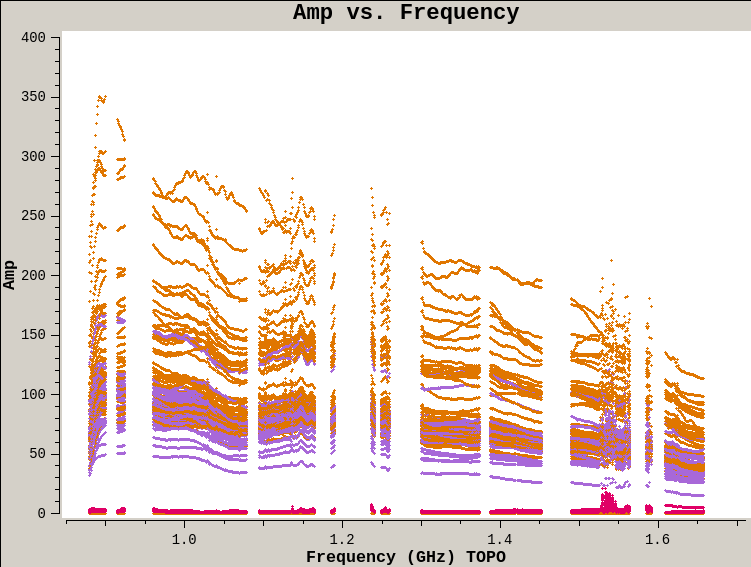

In [ ]:
plotms(vis=msfile,
       xaxis='freq',
       yaxis='amp',
       averagedata=True,
       avgtime='900',
       field='PKS1934-63',
       antenna='*&&&',
       coloraxis='corr',
       plotrange=[0.850, 1.712, 0, 0],
       showgui=False,
       plotfile='mkat_passband.png',
       overwrite=True,
       )
Image('mkat_passband.png', height=500)

Afristar has been switched off, so view your passband before blindly flagging out these channels, it may not have RFI in this region

#### IRIDIUM

In [ ]:
flagdata(vis=msfile, mode='manual', spw='*:1616MHz~1626MHZ', action='apply');

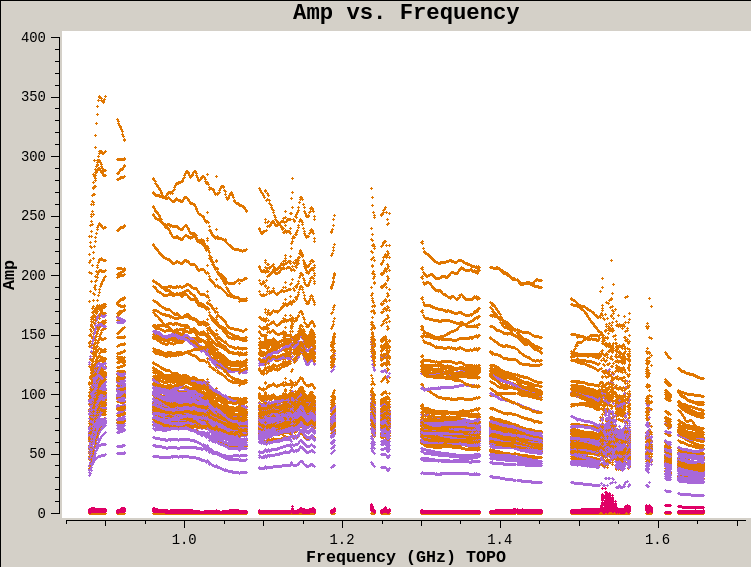

In [ ]:
plotms(vis=msfile,
       xaxis='freq',
       yaxis='amp',
       averagedata=True,
       avgtime='900',
       field='PKS1934-63',
       antenna='*&&&',
       coloraxis='corr',
       plotrange=[0.850, 1.712, 0, 0],
       showgui=False,
       plotfile='mkat_passband.png',
       overwrite=True,
       )
Image('mkat_passband.png', height=500)

#### Inmarsat

In [ ]:
flagdata(vis=msfile, mode='manual', spw='*:1526MHz~1554MHZ', action='apply');

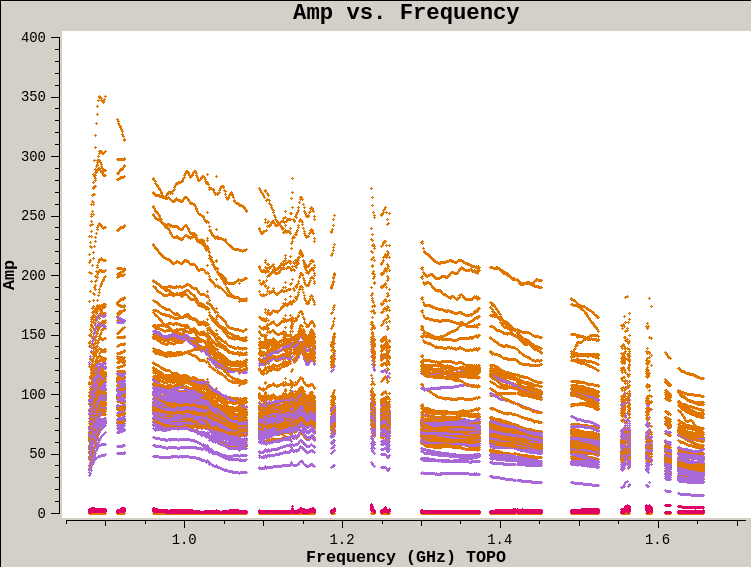

In [ ]:
plotms(vis=msfile,
       xaxis='freq',
       yaxis='amp',
       averagedata=True,
       avgtime='900',
       field='PKS1934-63',
       antenna='*&&&',
       coloraxis='corr',
       plotrange=[0.850, 1.712, 0, 0],
       showgui=False,
       plotfile='mkat_passband.png',
       overwrite=True,
       )
Image('mkat_passband.png', height=500)

#### Alkantpan

In [ ]:
flagdata(vis=msfile, mode='manual', spw='*:1600MHz', action='apply');

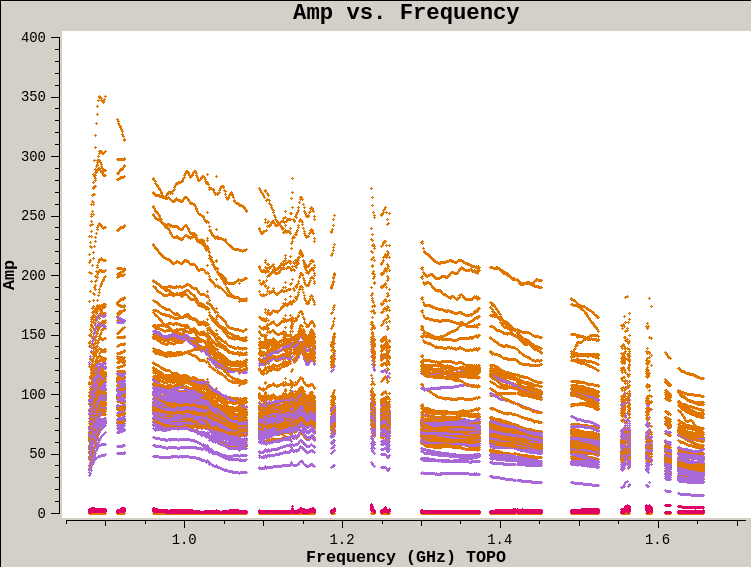

In [ ]:
plotms(vis=msfile,
       xaxis='freq',
       yaxis='amp',
       averagedata=True,
       avgtime='900',
       field='PKS1934-63',
       antenna='*&&&',
       coloraxis='corr',
       plotrange=[0.850, 1.712, 0, 0],
       showgui=False,
       plotfile='mkat_passband.png',
       overwrite=True,
       )
Image('mkat_passband.png', height=500)

Military test sight north of MeerKAT.
It is not a continuous source of RFI, so again, evaluate the need to flag out this channel during data inspection.

## Copy flagged data back to Google drive

In [ ]:
!tar -cvzf "1548939342_sdp_l0_flagged.ms.tar.gz" "scratch"

In [ ]:
!tar -tvzf "1548939342_sdp_l0_flagged.ms.tar.gz"

**NOTE: update the path below to the appropriate directory in drive where you want to save the data**

In [40]:
!cp "1548939342_sdp_l0_flagged.ms.tar.gz" "drive/MyDrive/ARIWS public datasets/output"